In [16]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [17]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2.5.0-dev20201117
Num GPUs Available:  0


In [18]:
directory = "/home/atti/Documents/PV162_CV/IMAGES/Coins/Euro/"
euro1_img_names = os.listdir(directory + "euro1")
euro2_img_names = os.listdir(directory + "euro2")
euro2_img_names

['1coin1.png',
 '5coin2.png',
 '6coin20.png',
 '8coin1.png',
 '7coin7.png',
 '2coin2.png']

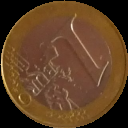

In [19]:
PIL.Image.open(directory + "euro1/" + euro1_img_names[0])

In [20]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123
)

Found 237 files belonging to 4 classes.
Using 190 files for training.
Found 237 files belonging to 4 classes.
Using 47 files for validation.


In [21]:
class_names = train_ds.class_names

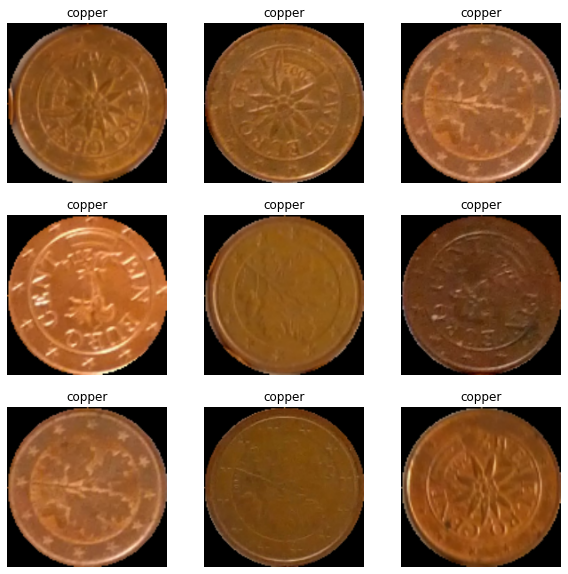

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [23]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 180, 180, 3)
(32,)
